# Project 2

**Group # 1**
Adam Gersowitz, Diego Correa, Maria A Ginorio

Identify a large 2-node network dataset—you can start with a dataset in a repository.
Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.

Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
What can you infer about each of the distinct groups?

## Required Packages

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite as bp
import numpy as np
import pandas as pd


## About the Data

We will consider the yahoo finance module in python and it is a very easy module to work with.

The ticker Module, which allows access to data in pythonic way.

[Dow Jones Wiki](https://simple.wikipedia.org/wiki/Dow_Jones_Industrial_Average)



In [2]:
import yfinance as yf

In [3]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]


In [4]:
# extract symbol from df
# add them into a list
tickers = tickers.Symbol.to_list()

In [5]:
# create a list of dfs that will be populated with the Institutional Holder df
# the institutional holder info its extracted from the symbol ticker

frames = []

for ticker in tickers:
    var = yf.Ticker(ticker)
    frame = var.institutional_holders
    frame['Comp'] = var.ticker
    frames.append(frame)

In [6]:
# create variable containing a list of all 30 companies of dow jones
all_dow = pd.concat(frames)

### Dow Jones Companies + Institutional Holders Ownership

In [7]:
all_dow

,Holder,Shares,Date Reported,% Out,Value,Comp
0,"Vanguard Group, Inc. (The)",50240763,2021-12-30,0.0880,8924266731,MMM
1,Blackrock Inc.,41810186,2021-12-30,0.0732,7426743339,MMM
2,State Street Corporation,30979936,2021-12-30,0.0542,5502966031,MMM
3,"Geode Capital Management, LLC",10780080,2021-12-30,0.0189,1914865610,MMM
4,"Charles Schwab Investment Management, Inc.",10557291,2021-12-30,0.0185,1875291600,MMM
...,...,...,...,...,...,...
5,Northern Trust Corporation,16607064,2021-12-30,0.0060,2402876090,WMT
6,Morgan Stanley,15580922,2021-12-30,0.0056,2254403604,WMT
7,Norges Bank Investment Management,15012238,2020-12-30,0.0054,2164014107,WMT
8,State Farm Mutual Automobile Insurance Co,13083050,2021-12-30,0.0047,1892986504,WMT


## Project Bipartite Graph

In order to create a relationship we have chosen to use in:
* Holder (right)
* Company (left)
* Shares (relationship)

In [8]:
# create a graph
edges = [tuple(x) for x in all_dow[['Holder', 'Comp', 'Shares']].values.tolist()]


In [9]:
B = nx.Graph()
B.add_nodes_from(all_dow['Holder'].unique(), bipartite=0, label='holder',edge_attr=True)
B.add_nodes_from(all_dow['Comp'].unique(), bipartite=1, label='comp', edge_attr=True)

for row in edges:
    B.add_edge(row[0], row[1], shares=row[2])

In [21]:
edge_list = nx.to_edgelist(B)

### Test Network Connectivity
In order to proceed with the bipartite analysis we run a test using Networkx functions to check for connectivity and  a bipartite graph

In [159]:
print(nx.is_connected(B))

True


In [160]:
print(nx.is_bipartite(B))

True


### Sets for Bipartite
In order to work with bipartite networks and utilize the modules in the Bipartite Module. We will need to utilize sets that are used as containers to drop them in the functions needed for analysis.

* Top_nodes = Institutional Holders that have shares of companies in the DIJA
* Bottom_nodes = Companies in the Dow Jones

In [22]:
bottom_nodes, top_nodes = bp.sets(B)

In [23]:
top_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(B) - top_nodes

In [158]:
print(list(top_nodes))

['Aristotle Capital Management, LLC', 'Capital World Investors', 'Barclays Plc', 'Berkshire Hathaway, Inc', 'Ameriprise Financial, Inc.', 'Invesco Ltd.', 'Norges Bank Investment Management', 'Capital Research Global Investors', 'Blackrock Inc.', 'Morgan Stanley', 'Price (T.Rowe) Associates Inc', 'State Street Corporation', 'Massachusetts Financial Services Co.', 'JP Morgan Chase & Company', 'Bill & Melinda Gates Foundation Trust', 'Fisher Asset Management, LLC', 'Jennison Associates LLC', 'State Farm Mutual Automobile Insurance Co', 'Northern Trust Corporation', 'Geode Capital Management, LLC', 'Franklin Resources, Inc.', 'AllianceBernstein, L.P.', 'Primecap Management Company', 'Flossbach von Storch AG', 'Bank of America Corporation', 'Charles Schwab Investment Management, Inc.', 'Capital International Investors', 'Vanguard Group, Inc. (The)', 'Newport Trust Co', 'Wells Fargo & Company', 'Dodge & Cox Inc', 'Wellington Management Group, LLP', 'Bank Of New York Mellon Corporation', 'Loo

In [157]:
print(list(bottom_nodes))

['INTC', 'AAPL', 'DIS', 'NKE', 'MMM', 'JNJ', 'CAT', 'AMGN', 'PG', 'WBA', 'MRK', 'UNH', 'TRV', 'GS', 'HON', 'JPM', 'VZ', 'AXP', 'V', 'KO', 'CSCO', 'CVX', 'HD', 'IBM', 'BA', 'CRM', 'WMT', 'DOW', 'MCD', 'MSFT']


### Set Colors

In order to differentiate our bipartite network we assign different colors to the top_nodes and bottom nodes to obtain clear graph

In [26]:
color = bp.color(B)

color_dict = {0:'b', 1:'r'}

color_list = [color_dict[i[1]] for i in B.nodes.data('bipartite')]

In [27]:
pos = dict()
color = []
pos.update( (n, (1, i)) for i, n in enumerate(bottom_nodes) )
pos.update( (n, (2, i)) for i, n in enumerate(top_nodes) )


### Hello Dow Jones Graph

Bipartite graphs naturally appear in applications involving two types of objects, or objects playing different roles.

Institutional Holders = Blue
Companies = Red
In this graph the node size is based on its degree which are the number of connections (shares) each node has.

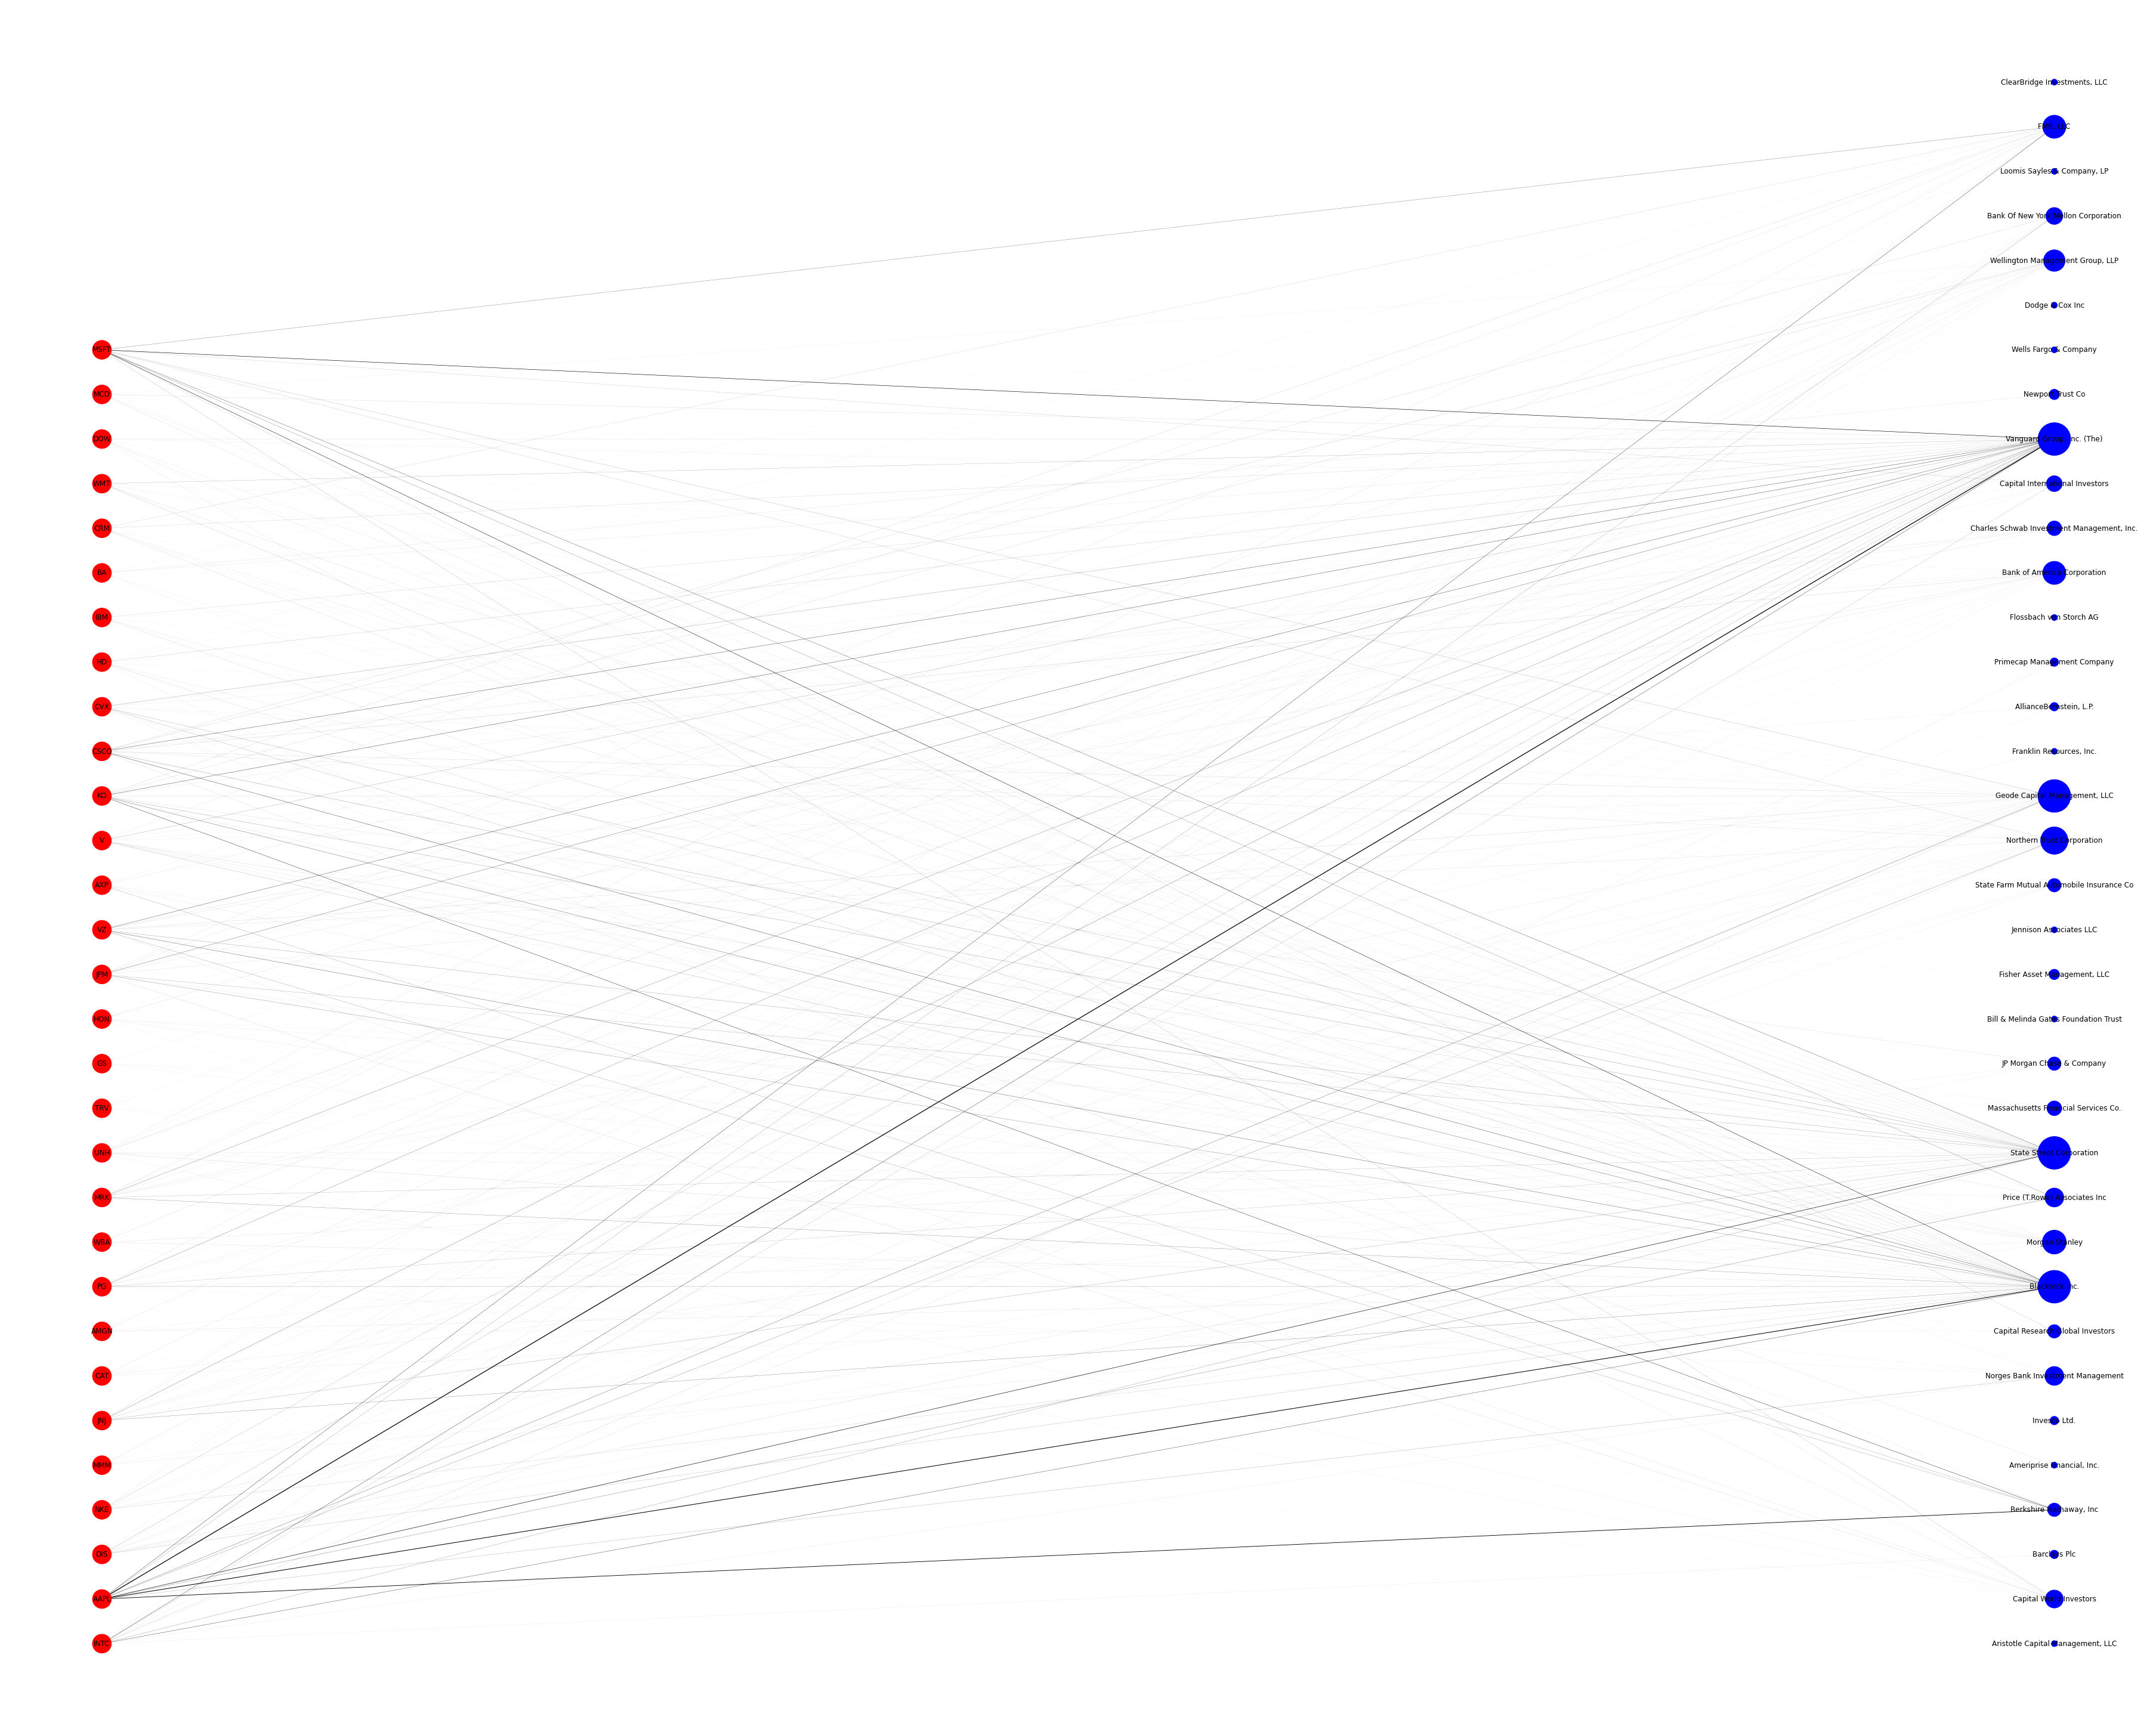

In [28]:
# hello dow jones network
plt.figure(figsize=(50,40))
nx.draw(B, pos=pos,
        with_labels=True,
        node_color = color_list,
        node_size = [v * 100 for v in dict(B.degree()).values()],
        width = [v[2]['shares']/1_000_000_000 for v in edge_list])
plt.show()

In [29]:
print(nx.info(B))

Name: 
Type: Graph
Number of nodes: 66
Number of edges: 300
Average degree:   9.0909


## Partition Analysis

In [30]:
nx.number_connected_components(B)

1

First off, we need to extract nodes from a particular partition.

In [31]:
N_graph = B.copy()

holders_graph = bp.projected_graph(N_graph, top_nodes)
comp_graph = bp.projected_graph(N_graph, bottom_nodes)

### Partition 1 - Companies in DIJA

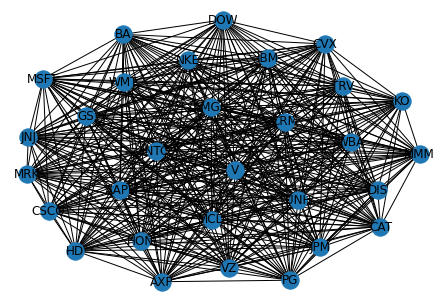

In [26]:
nx.draw(comp_graph, with_labels=True) # companies

### Degree Centrality Companies

The degree centrality metric is something we can calculate for bipartite graphs. Recall that the degree centrality metric is the number of neighbors of a node divided by the total number of possible neighbors.

In a unipartite graph, the denominator can be the total number of nodes less one (if self-loops are not allowed) or simply the total number of nodes (if self loops are allowed).

In [32]:
dc_comp = bp.degree_centrality(N_graph, bottom_nodes)
dc_comp_df = pd.DataFrame.from_dict({
    'node': list(dc_comp.keys()),
    'degree': list(dc_comp.values())
})
dc_comp_df.sort_values('degree', ascending=False)

,node,degree
57,"Vanguard Group, Inc. (The)",1.000000
49,"Geode Capital Management, LLC",1.000000
41,State Street Corporation,1.000000
38,Blackrock Inc.,1.000000
48,Northern Trust Corporation,0.700000
...,...,...
59,Wells Fargo & Company,0.033333
44,Bill & Melinda Gates Foundation Trust,0.033333
53,Flossbach von Storch AG,0.033333
50,"Franklin Resources, Inc.",0.033333


### Partition 2 -  Institutional Holders


### Degree Centrality Inst Holders

In [34]:
dc_holder = bp.degree_centrality(N_graph, top_nodes)
dc_holder_df = pd.DataFrame.from_dict({
    'node': list(dc_holder.keys()),
    'degree': list(dc_holder.values())
})
dc_holder_df.sort_values('degree', ascending=False)

,node,degree
19,"Geode Capital Management, LLC",1.000000
27,"Vanguard Group, Inc. (The)",1.000000
11,State Street Corporation,1.000000
8,Blackrock Inc.,1.000000
18,Northern Trust Corporation,0.700000
...,...,...
20,"Franklin Resources, Inc.",0.033333
16,Jennison Associates LLC,0.033333
14,Bill & Melinda Gates Foundation Trust,0.033333
4,"Ameriprise Financial, Inc.",0.033333


### Node Partition Distributions Plot

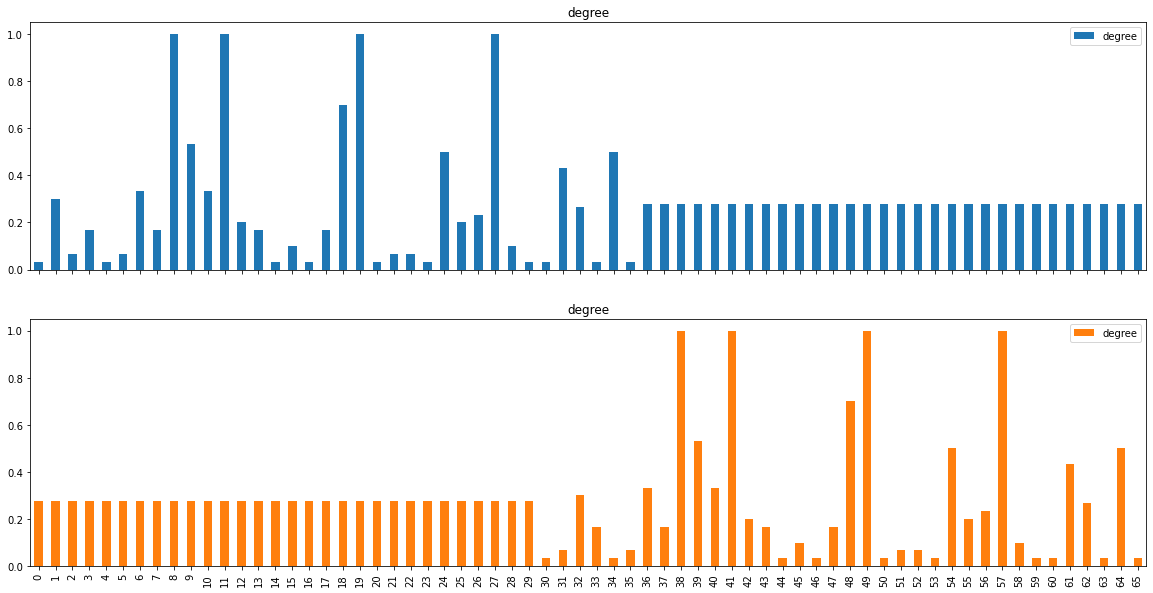

In [60]:
summary_df = pd.concat([dc_holder_df,dc_comp_df], axis=1)
viz = summary_df.plot.bar(rot=90, subplots=True, figsize=(20,10))

## Partition Graph Projections
How does one compute graph projections using NetworkX? Turns out, NetworkX has a bipartite submodule, which gives us all of the facilities that we need to interact with bipartite algorithms.

We will perform analysis only in the institutional holder partition

First of all, we need to check that the graph is indeed a bipartite graph. NetworkX provides a function for us to do so:

In [156]:
print(bp.is_bipartite(N_graph))

True


### Projected Graphs

Now, what is the interpretation of these projected graphs?

* For comp_graph, we found the companies who are linked by sharing Institutional Holders
* For Holder_graph, we found Institutional Holders that are linked by shared share holding or investment in this companies.

In [37]:
comp_graph = bp.projected_graph(N_graph, bottom_nodes)
holder_graph = bp.projected_graph(N_graph, top_nodes)

In [155]:
print(list(comp_graph.edges(data=True))[0:5])

[('INTC', 'AAPL', {}), ('INTC', 'DIS', {}), ('INTC', 'NKE', {}), ('INTC', 'MMM', {}), ('INTC', 'JNJ', {})]


For Holder_graph, we found Institutional Holders that are linked by sharing shares or fragments of ownership in these companies.


In [154]:
print(list(holder_graph.edges(data=True))[0:5])

[('Aristotle Capital Management, LLC', 'Northern Trust Corporation', {}), ('Aristotle Capital Management, LLC', 'Vanguard Group, Inc. (The)', {}), ('Aristotle Capital Management, LLC', 'Geode Capital Management, LLC', {}), ('Aristotle Capital Management, LLC', 'Capital World Investors', {}), ('Aristotle Capital Management, LLC', 'Blackrock Inc.', {})]


### Weighted Projection Graphs

The weighted projected graph is the projection of the bipartite network B onto the specified nodes with weights representing the number of shared neighbors or the ratio between actual shared neighbors and possible shared neighbors if ratio is True. The nodes retain their attributes and are connected in the resulting graph if they have an edge to a common node in the original graph.

Though we were able to find out which graphs were connected with one another, we did not record in the resulting projected graph the strength by which the two nodes were connected. To preserve this information, we need another function:

**The Weighted projection will help us obtain the information of the strength by which two nodes are connected**

### Weighted Projection on Companies

In [40]:
weighted_comp_graph = bp.weighted_projected_graph(N_graph, bottom_nodes, ratio=False)
list(weighted_comp_graph.edges(data=True))

[('INTC', 'UNH', {'weight': 5}),
 ('INTC', 'TRV', {'weight': 5}),
 ('INTC', 'GS', {'weight': 6}),
 ('INTC', 'AAPL', {'weight': 7}),
 ('INTC', 'HON', {'weight': 4}),
 ('INTC', 'JPM', {'weight': 5}),
 ('INTC', 'DIS', {'weight': 5}),
 ('INTC', 'NKE', {'weight': 6}),
 ('INTC', 'VZ', {'weight': 5}),
 ('INTC', 'AXP', {'weight': 4}),
 ('INTC', 'MMM', {'weight': 5}),
 ('INTC', 'V', {'weight': 4}),
 ('INTC', 'KO', {'weight': 4}),
 ('INTC', 'JNJ', {'weight': 6}),
 ('INTC', 'CSCO', {'weight': 6}),
 ('INTC', 'HD', {'weight': 5}),
 ('INTC', 'CVX', {'weight': 7}),
 ('INTC', 'CAT', {'weight': 6}),
 ('INTC', 'IBM', {'weight': 7}),
 ('INTC', 'AMGN', {'weight': 6}),
 ('INTC', 'PG', {'weight': 6}),
 ('INTC', 'BA', {'weight': 5}),
 ('INTC', 'CRM', {'weight': 4}),
 ('INTC', 'WBA', {'weight': 6}),
 ('INTC', 'WMT', {'weight': 6}),
 ('INTC', 'DOW', {'weight': 7}),
 ('INTC', 'MRK', {'weight': 7}),
 ('INTC', 'MCD', {'weight': 5}),
 ('INTC', 'MSFT', {'weight': 6}),
 ('AAPL', 'UNH', {'weight': 6}),
 ('AAPL', 'TRV

In [59]:
weight_list = list(weighted_comp_graph.edges(data=True))
weight_df = pd.DataFrame.from_records(weight_list, columns=['comp1', 'comp2', 'weight'])


In [69]:
weights = weight_df['weight'].tolist()
w = pd.DataFrame(weights)

In [70]:
weight_df.drop('weight', axis=1, inplace=True)
weight_df = weight_df.assign(weight=w['weight'])

In [71]:
weight_df.sort_values('weight', ascending=True)

,comp1,comp2,weight
307,GS,CVX,4
313,GS,MCD,4
312,GS,DOW,4
161,CAT,GS,4
32,AAPL,HON,4
...,...,...,...
433,DOW,MSFT,8
404,CVX,DOW,8
223,PG,MCD,9
281,UNH,MSFT,9


In [153]:
print(weight_df["weight"].mean())

6.006896551724138


In [40]:
# C = weighted_comp_graph
#
# comp_weight = []
#
# def weight_rank_comp(C):
#     for weight in C:
#         comp_weight.append(dict(node = bottom_nodes, weight = weighted_comp_graph.edges[C, bottom_nodes]["weight"]))
#     return pd.DataFrame(comp_weight).sort_values("weight", ascending=False)

In [ ]:
# #\todo\**
# C = weighted_comp_graph
#
# c_list = {}
#
# for h in N_bottom:
#     c_list[h] = C.degree(h)
#
# comp_df = pd.DataFrame.from_dict(c_list, orient='index', columns=['Degree'])
#
# print(comp_df.nlargest(5, 'Degree'))

### Weighted Projection on Institutional Holders

In [152]:
weighted_holders_graph = bp.weighted_projected_graph(N_graph, top_nodes, ratio=False)
print(list(weighted_holders_graph.edges(data=True)))

[('Aristotle Capital Management, LLC', 'Northern Trust Corporation', {'weight': 1}), ('Aristotle Capital Management, LLC', 'Vanguard Group, Inc. (The)', {'weight': 1}), ('Aristotle Capital Management, LLC', 'Geode Capital Management, LLC', {'weight': 1}), ('Aristotle Capital Management, LLC', 'Capital World Investors', {'weight': 1}), ('Aristotle Capital Management, LLC', 'Blackrock Inc.', {'weight': 1}), ('Aristotle Capital Management, LLC', 'State Street Corporation', {'weight': 1}), ('Aristotle Capital Management, LLC', 'FMR, LLC', {'weight': 1}), ('Aristotle Capital Management, LLC', 'Invesco Ltd.', {'weight': 1}), ('Aristotle Capital Management, LLC', 'Norges Bank Investment Management', {'weight': 1}), ('Capital World Investors', 'Northern Trust Corporation', {'weight': 6}), ('Capital World Investors', 'Geode Capital Management, LLC', {'weight': 9}), ('Capital World Investors', 'Berkshire Hathaway, Inc', {'weight': 1}), ('Capital World Investors', 'Invesco Ltd.', {'weight': 1}), 

In [82]:
weight2_list = list(weighted_holders_graph.edges(data=True))
weight2_df = pd.DataFrame.from_records(weight2_list, columns=['holder1', 'holder2', 'weight'])

In [83]:
weights2 = weight2_df['weight'].tolist()
w = pd.DataFrame(weights2)

In [84]:
weight2_df.drop('weight', axis=1, inplace=True)
weight2_df = weight2_df.assign(weight=w['weight'])

In [85]:
weight2_df.sort_values('weight', ascending=True)

,holder1,holder2,weight
0,"Aristotle Capital Management, LLC",Northern Trust Corporation,1
203,Massachusetts Financial Services Co.,"AllianceBernstein, L.P.",1
204,Massachusetts Financial Services Co.,Flossbach von Storch AG,1
206,Massachusetts Financial Services Co.,"Charles Schwab Investment Management, Inc.",1
207,Massachusetts Financial Services Co.,Capital International Investors,1
...,...,...,...
123,Blackrock Inc.,"Geode Capital Management, LLC",30
192,State Street Corporation,"Vanguard Group, Inc. (The)",30
131,Blackrock Inc.,"Vanguard Group, Inc. (The)",30
115,Blackrock Inc.,State Street Corporation,30


In [149]:
print(weight2_df["weight"].mean())

3.9589442815249267


In [ ]:
# H = weighted_holders_graph
#
# h_list = {}
#
# for h in N_top:
#     h_list[h] = H.degree(h)
#
# holder_df = pd.DataFrame.from_dict(h_list, orient='index', columns=['Degree'])
#
# print(holder_df.nlargest(5, 'Degree'))

In [ ]:
# print(holder_df.nsmallest(5, 'Degree'))

In [ ]:
# import plotly.express as px
# fig = px.histogram(holder_df, x = 'Degree', nbins = 10)
# fig.update_layout(title = 'Histogram of Degree')
# fig.show()

## The Island Method

imagine our network as an island with a complex terrain, where the height of each point on the terrain is defined by the value of a node (e.g., degree centrality) or edge (e.g., number of shares in a company a institutional holder has )

In terms of networks, this means that the giant component gets split up into smaller components, and areas with the strongest amount of shares ownership activity (subcores) become their own components that can be analyzed separately.

### Island Method Function

In [87]:
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            w = edata['weight']
            g2.add_edge(f,to,weighth=w)
    return g2

### Islands in Companies Set Weight > 7

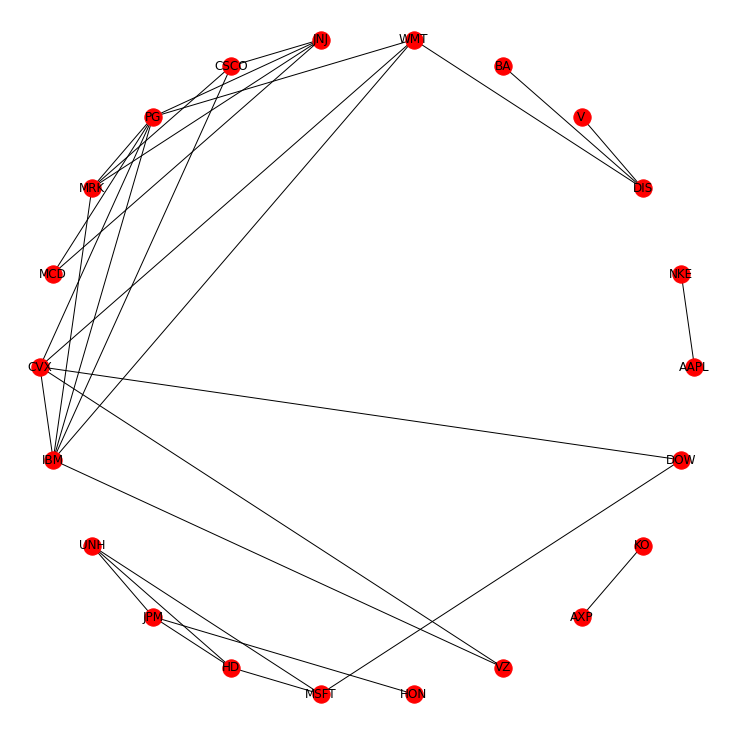

In [100]:
island_trim = trim_edges(weighted_comp_graph, weight=7)
plt.figure(figsize=(10,10))
nx.draw_circular(island_trim, node_color='r', with_labels=True)

### Islands in Holders weight > 7

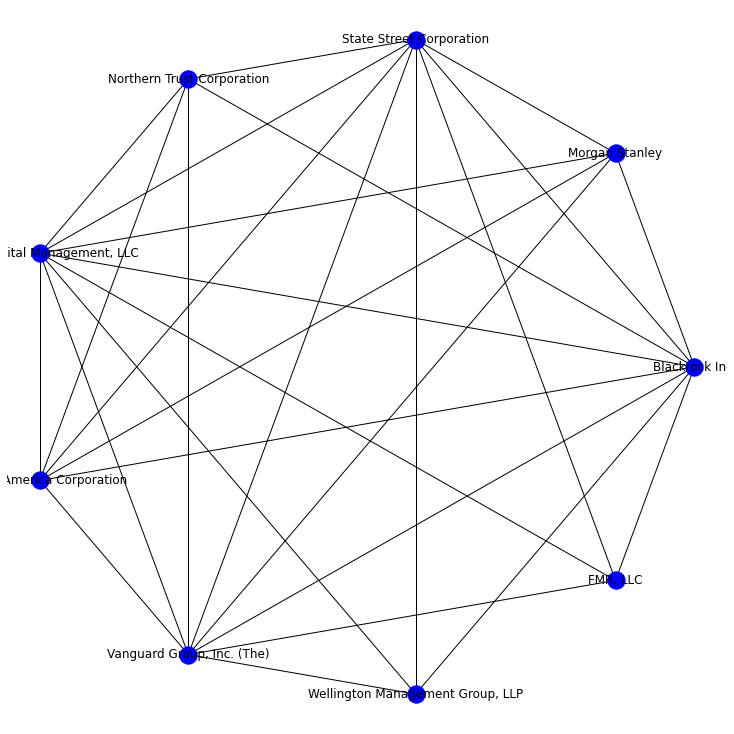

In [102]:
island_holder_trim = trim_edges(weighted_holders_graph, weight=10)
plt.figure(figsize=(10,10))
nx.draw_circular(island_holder_trim, node_color='blue', with_labels=True)

### Define the Raise of Water level

In [146]:
def island_method(g, iterations=5):
    weightss= [edata['weight'] for f,to,edata in g.edges(data=True)]

    mn=int(min(weightss))
    mx=int(max(weightss))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)

    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

### Companies

This function will return a list of graph objects, each corresponding to a specific water level.

In [150]:
island_method_comp = island_method(weighted_comp_graph, iterations=5)
print(island_method_comp)

[[4, <networkx.classes.graph.Graph object at 0x000001C7AC6FC828>], [5, <networkx.classes.graph.Graph object at 0x000001C7AC6FCA58>], [6, <networkx.classes.graph.Graph object at 0x000001C7B1153940>], [7, <networkx.classes.graph.Graph object at 0x000001C7B1153EF0>], [8, <networkx.classes.graph.Graph object at 0x000001C7B1153C88>]]


### Holders

This function will return a list of graph objects, each corresponding to a specific water level.

In [151]:
island_method_holder = island_method(weighted_holders_graph, iterations=5)
print(island_method_holder)

[[1, <networkx.classes.graph.Graph object at 0x000001C7AC70E828>], [6, <networkx.classes.graph.Graph object at 0x000001C7AC725EB8>], [11, <networkx.classes.graph.Graph object at 0x000001C7AC725DD8>], [16, <networkx.classes.graph.Graph object at 0x000001C7AC725F60>], [21, <networkx.classes.graph.Graph object at 0x000001C7AC7255C0>], [26, <networkx.classes.graph.Graph object at 0x000001C7AC725978>]]
